# Heart patients cannot do without quinidine, which can affect the rate of                   quinidine in the blood in a way that threatens the patient's life?


In [63]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline


## Read Dataset

In [64]:
diabetes="Quinidine.csv"

In [65]:
df = pd.read_csv(diabetes, sep=',', header=0, index_col='Unnamed: 0')
df

,Subject,time,conc,dose,interval,Age,Height,Weight,Race,Smoke,Ethanol,Heart,Creatinine,glyco
1,1,0.00,NaN,249.0,NaN,60,69,106,Caucasian,no,current,Moderate,>= 50,0.41
2,1,3.00,NaN,249.0,NaN,60,69,106,Caucasian,no,current,Moderate,>= 50,0.41
3,1,6.00,NaN,249.0,NaN,60,69,106,Caucasian,no,current,Moderate,>= 50,0.41
4,1,16.00,NaN,201.0,NaN,60,69,106,Caucasian,no,current,Moderate,>= 50,0.41
5,1,24.00,NaN,201.0,NaN,60,69,106,Caucasian,no,current,Moderate,>= 50,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,139,126.00,NaN,301.0,NaN,66,71,91,Caucasian,no,former,Severe,< 50,1.28
1468,139,140.00,NaN,NaN,NaN,66,71,91,Caucasian,no,former,Severe,< 50,1.28
1469,139,144.28,3.2,NaN,NaN,66,71,91,Caucasian,no,former,Severe,< 50,1.28
1470,139,160.00,NaN,301.0,NaN,66,71,91,Caucasian,no,former,Severe,< 50,1.40


## Dataset Exploration

In [66]:
df.shape

(1471, 14)

In [67]:
df.describe()

,Subject,time,conc,dose,interval,Age,Height,Weight,glyco
count,1471.000000,1471.000000,361.000000,1028.000000,249.000000,1471.000000,1471.000000,1471.000000,1471.000000
mean,73.926581,373.252243,2.454294,225.301556,7.108434,66.732155,69.193066,79.660775,1.281679
std,46.973404,1012.327147,1.217894,71.900644,1.552927,9.243658,3.567347,15.433988,0.476199
min,1.000000,0.000000,0.400000,83.000000,4.000000,42.000000,60.000000,41.000000,0.390000
25%,41.000000,16.000000,1.600000,166.000000,6.000000,60.000000,67.000000,69.500000,0.930000
50%,74.000000,60.000000,2.300000,201.000000,6.000000,66.000000,69.000000,78.000000,1.230000
75%,103.500000,241.250000,3.000000,249.000000,8.000000,74.000000,72.000000,89.000000,1.540000
max,223.000000,8095.500000,9.400000,603.000000,12.000000,92.000000,79.000000,119.000000,3.160000


In [68]:
df.columns

Index(['Subject', 'time', 'conc', 'dose', 'interval', 'Age', 'Height',
       'Weight', 'Race', 'Smoke', 'Ethanol', 'Heart', 'Creatinine', 'glyco'],
      dtype='object')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1471 entries, 1 to 1471
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject     1471 non-null   int64  
 1   time        1471 non-null   float64
 2   conc        361 non-null    float64
 3   dose        1028 non-null   float64
 4   interval    249 non-null    float64
 5   Age         1471 non-null   int64  
 6   Height      1471 non-null   int64  
 7   Weight      1471 non-null   int64  
 8   Race        1471 non-null   object 
 9   Smoke       1471 non-null   object 
 10  Ethanol     1471 non-null   object 
 11  Heart       1471 non-null   object 
 12  Creatinine  1471 non-null   object 
 13  glyco       1471 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 172.4+ KB


In [70]:
df.dtypes

Subject         int64
time          float64
conc          float64
dose          float64
interval      float64
Age             int64
Height          int64
Weight          int64
Race           object
Smoke          object
Ethanol        object
Heart          object
Creatinine     object
glyco         float64
dtype: object

In [71]:
df.nunique()

Subject       136
time          728
conc           56
dose           15
interval        4
Age            38
Height         20
Weight         58
Race            3
Smoke           2
Ethanol         3
Heart           3
Creatinine      2
glyco         145
dtype: int64

In [72]:
df.isna().sum()

Subject          0
time             0
conc          1110
dose           443
interval      1222
Age              0
Height           0
Weight           0
Race             0
Smoke            0
Ethanol          0
Heart            0
Creatinine       0
glyco            0
dtype: int64

In [73]:
df.head()

,Subject,time,conc,dose,interval,Age,Height,Weight,Race,Smoke,Ethanol,Heart,Creatinine,glyco
1,1,0.0,NaN,249.0,NaN,60,69,106,Caucasian,no,current,Moderate,>= 50,0.41
2,1,3.0,NaN,249.0,NaN,60,69,106,Caucasian,no,current,Moderate,>= 50,0.41
3,1,6.0,NaN,249.0,NaN,60,69,106,Caucasian,no,current,Moderate,>= 50,0.41
4,1,16.0,NaN,201.0,NaN,60,69,106,Caucasian,no,current,Moderate,>= 50,0.41
5,1,24.0,NaN,201.0,NaN,60,69,106,Caucasian,no,current,Moderate,>= 50,0.41


In [74]:
df.tail()

,Subject,time,conc,dose,interval,Age,Height,Weight,Race,Smoke,Ethanol,Heart,Creatinine,glyco
1467,139,126.00,NaN,301.0,NaN,66,71,91,Caucasian,no,former,Severe,< 50,1.28
1468,139,140.00,NaN,NaN,NaN,66,71,91,Caucasian,no,former,Severe,< 50,1.28
1469,139,144.28,3.2,NaN,NaN,66,71,91,Caucasian,no,former,Severe,< 50,1.28
1470,139,160.00,NaN,301.0,NaN,66,71,91,Caucasian,no,former,Severe,< 50,1.40
1471,139,169.55,2.1,NaN,NaN,66,71,91,Caucasian,no,former,Severe,< 50,1.40


## Dataset cleaning

In [75]:
df.rename(columns={'Subject': 'Patient_ID'}, inplace=True)

In [76]:
df

,Patient_ID,time,conc,dose,interval,Age,Height,Weight,Race,Smoke,Ethanol,Heart,Creatinine,glyco
1,1,0.00,NaN,249.0,NaN,60,69,106,Caucasian,no,current,Moderate,>= 50,0.41
2,1,3.00,NaN,249.0,NaN,60,69,106,Caucasian,no,current,Moderate,>= 50,0.41
3,1,6.00,NaN,249.0,NaN,60,69,106,Caucasian,no,current,Moderate,>= 50,0.41
4,1,16.00,NaN,201.0,NaN,60,69,106,Caucasian,no,current,Moderate,>= 50,0.41
5,1,24.00,NaN,201.0,NaN,60,69,106,Caucasian,no,current,Moderate,>= 50,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,139,126.00,NaN,301.0,NaN,66,71,91,Caucasian,no,former,Severe,< 50,1.28
1468,139,140.00,NaN,NaN,NaN,66,71,91,Caucasian,no,former,Severe,< 50,1.28
1469,139,144.28,3.2,NaN,NaN,66,71,91,Caucasian,no,former,Severe,< 50,1.28
1470,139,160.00,NaN,301.0,NaN,66,71,91,Caucasian,no,former,Severe,< 50,1.40


In [77]:
df.drop('interval', axis=1, inplace=True)

In [78]:
grouped_data = df.groupby('Age')['dose']

for age, dose_values in grouped_data:
    mode_dose = dose_values.mode().values[0]
    df.loc[(df['Age'] == age) & (df['dose'].isnull()), 'dose'] = mode_dose


In [79]:
filtered = df[df['Heart'] == 'Moderate']
filtered1 = df[df['Heart'] == 'No/Mild']
filtered2 = df[df['Heart'] == 'Severe']

mode = filtered['conc'].mode().values[0]
mode1 = filtered1['conc'].mode().values[0]
mode2= filtered2['conc'].mode().values[0]

df.loc[df['Heart'] == 'Moderate' , 'conc'] = df.loc[df['Heart'] == 'Moderate', 'conc'].fillna(mode)
df.loc[df['Heart'] == 'No/Mild' , 'conc'] = df.loc[df['Heart'] == 'No/Mild', 'conc'].fillna(mode1)
df.loc[df['Heart'] == 'Severe' , 'conc'] = df.loc[df['Heart'] == 'Severe', 'conc'].fillna(mode2)

In [80]:
df.isna().sum()

Patient_ID    0
time          0
conc          0
dose          0
Age           0
Height        0
Weight        0
Race          0
Smoke         0
Ethanol       0
Heart         0
Creatinine    0
glyco         0
dtype: int64

## Dataset visualization

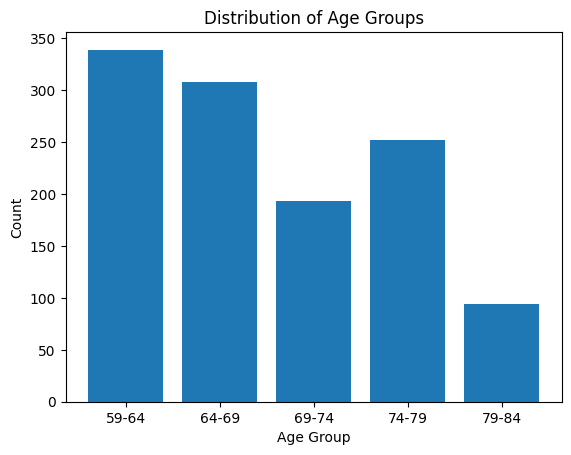

In [81]:
age_bins = range(59, 86, 5)  
age_group_counts = pd.cut(df['Age'], bins=age_bins, right=False).value_counts().sort_index()
plt.bar(range(len(age_group_counts)), age_group_counts.values)
age_group_labels = [f"{start}-{end}" for start, end in zip(age_bins[:-1], age_bins[1:])]
plt.xticks(range(len(age_group_counts)), age_group_labels)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')
plt.show()

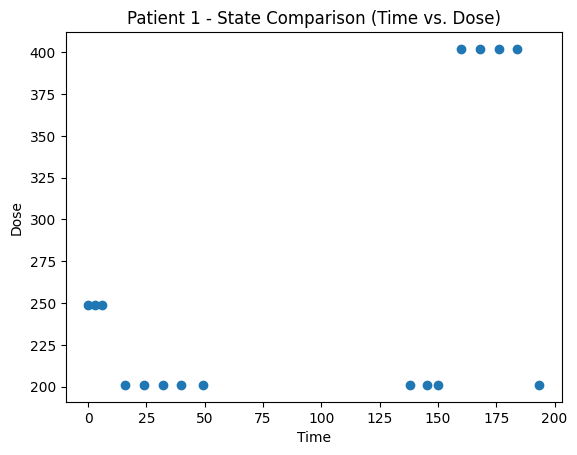

In [82]:
patient_id = int(input())
patient_data = df[df['Patient_ID'] == patient_id]
time = patient_data['time']
dose = patient_data['dose']
plt.scatter(time, dose)
plt.xlabel('Time')
plt.ylabel('Dose')
plt.title(f'Patient {patient_id} - State Comparison (Time vs. Dose)')
plt.show()

<Axes: xlabel='Smoke', ylabel='count'>

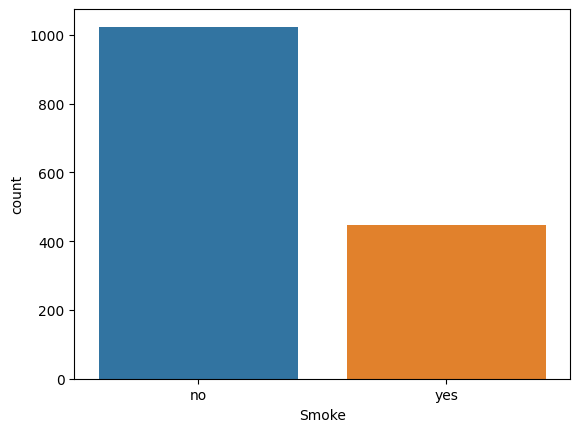

In [83]:
sns.countplot(data=df,x='Smoke')


Text(0.5, 1.0, "Percentage of 'ethanol' column")

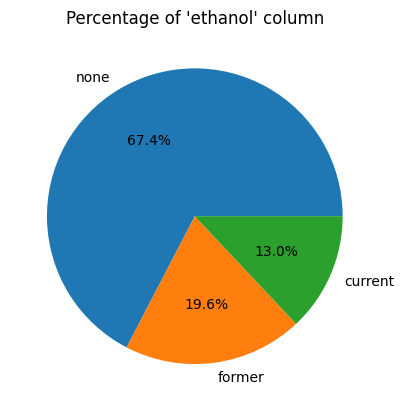

In [84]:
ethanol_count = df['Ethanol'].value_counts()
labels_ethanol = ethanol_count.index
sizes_ethanol = ethanol_count.values
percentages_ethanol = sizes_ethanol / sizes_ethanol.sum() * 100
plt.pie(percentages_ethanol, labels=labels_ethanol, autopct='%1.1f%%')
plt.title("Percentage of 'ethanol' column")


Text(0.5, 1.0, "Percentage of 'heart' column")

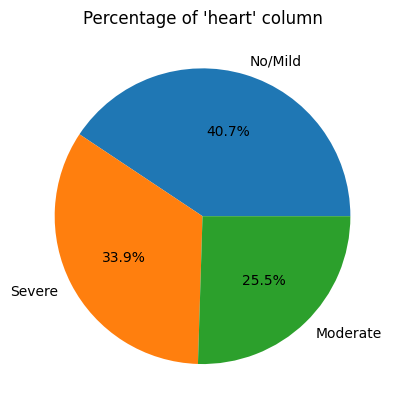

In [85]:
ethanol_count = df['Heart'].value_counts()
labels_ethanol = ethanol_count.index
sizes_ethanol = ethanol_count.values
percentages_ethanol = sizes_ethanol / sizes_ethanol.sum() * 100
plt.pie(percentages_ethanol, labels=labels_ethanol, autopct='%1.1f%%')
plt.title("Percentage of 'heart' column")


Text(0.5, 1.0, "Percentage of 'race' column")

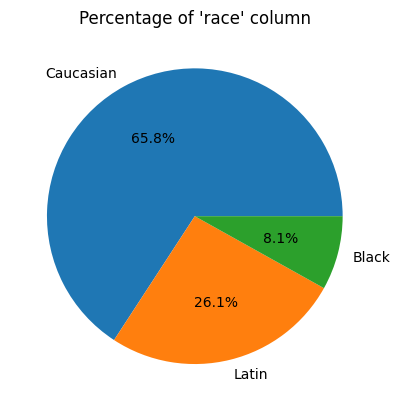

In [86]:
ethanol_count = df['Race'].value_counts()
labels_ethanol = ethanol_count.index
sizes_ethanol = ethanol_count.values
percentages_ethanol = sizes_ethanol / sizes_ethanol.sum() * 100
plt.pie(percentages_ethanol, labels=labels_ethanol, autopct='%1.1f%%')
plt.title("Percentage of 'race' column")


Text(0.5, 1.0, "Percentage of 'creatinine' column")

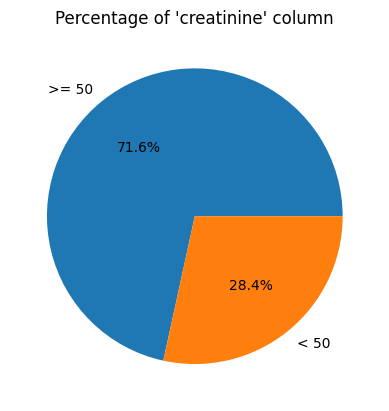

In [87]:
Creatinine_count = df['Creatinine'].value_counts()
labels_Creatinine = Creatinine_count.index
sizes_Creatinine = Creatinine_count.values
percentages_Creatinine = sizes_Creatinine / sizes_Creatinine.sum() * 100
plt.pie(percentages_Creatinine, labels=labels_Creatinine, autopct='%1.1f%%')
plt.title("Percentage of 'creatinine' column")


<Axes: xlabel='dose', ylabel='Weight'>

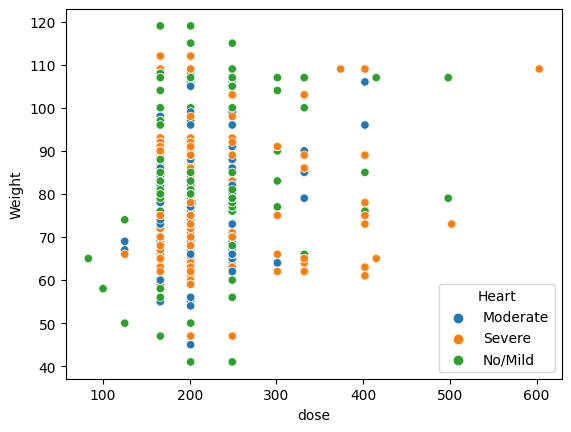

In [88]:
sns.scatterplot(x='dose', y='Weight', hue='Heart', data=df)

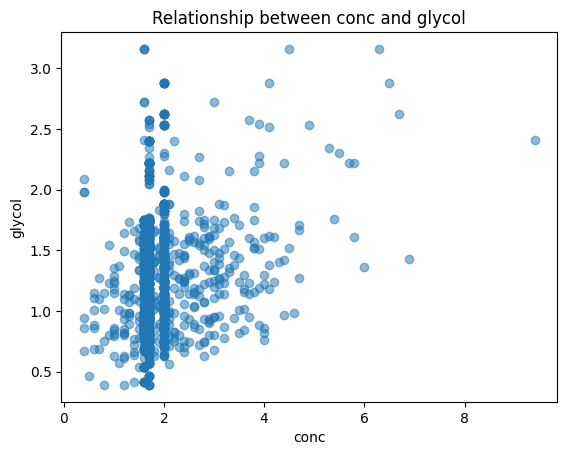

In [89]:
conc_values = df['conc']
glycol_values = df['glyco']
plt.scatter(conc_values, glycol_values, alpha=.5)
plt.xlabel('conc')
plt.ylabel('glycol')
plt.title('Relationship between conc and glycol')
plt.show()

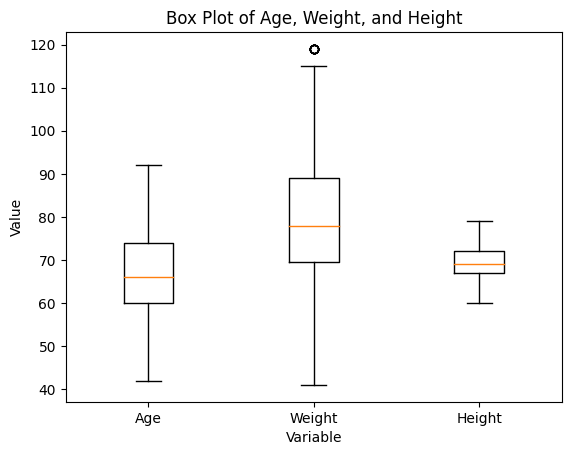

In [90]:
data = [df['Age'], df['Weight'], df['Height']]
plt.boxplot(data)
plt.xticks([1, 2, 3], ['Age', 'Weight', 'Height'])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Box Plot of Age, Weight, and Height')
plt.show()